In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
from fastai import vision
from fastai.metrics import error_rate
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [143]:
bs = 32

In [6]:
path = vision.Path("data/iwildcam-2020-fgvc7/")
path.ls()

[PosixPath('data/iwildcam-2020-fgvc7/iwildcam2020_megadetector_results.json'),
 PosixPath('data/iwildcam-2020-fgvc7/iwildcam2020_test_information.json'),
 PosixPath('data/iwildcam-2020-fgvc7/iwildcam2020_train_annotations.json'),
 PosixPath('data/iwildcam-2020-fgvc7/sample_submission.csv'),
 PosixPath('data/iwildcam-2020-fgvc7/test'),
 PosixPath('data/iwildcam-2020-fgvc7/train')]

In [115]:
datadict = json.load(open(path/'iwildcam2020_train_annotations.json'))
dataset = pd.DataFrame(datadict["annotations"])
dataset["cats"] = dataset["category_id"].astype("category")
images = pd.DataFrame(datadict["images"])

In [116]:
np.all(dataset["image_id"] == images["id"])

True

In [137]:
dataframe = pd.DataFrame()
dataframe["label"] = dataset["cats"].values
dataframe["category_id"] = dataset["category_id"]
dataframe["image_id"] = dataset["image_id"]
dataframe["filename"] = [str(path/"train")+"/"+fname for fname in images["file_name"].values]

In [133]:
dataframe.head()

,label,category_id,image_id,filename
0,73,73,96b00332-21bc-11ea-a13a-137349068a90,train/96b00332-21bc-11ea-a13a-137349068a90.jpg
1,4,4,879d74d8-21bc-11ea-a13a-137349068a90,train/879d74d8-21bc-11ea-a13a-137349068a90.jpg
2,227,227,9017f7aa-21bc-11ea-a13a-137349068a90,train/9017f7aa-21bc-11ea-a13a-137349068a90.jpg
3,250,250,90d93c58-21bc-11ea-a13a-137349068a90,train/90d93c58-21bc-11ea-a13a-137349068a90.jpg
4,2,2,887cd0ec-21bc-11ea-a13a-137349068a90,train/887cd0ec-21bc-11ea-a13a-137349068a90.jpg


In [144]:
data = vision.ImageDataBunch.from_lists(path, fnames=dataframe.filename.values, labels=dataframe.label.values, ds_tfms=vision.get_transforms(), size=224, bs=bs).normalize(vision.imagenet_stats)

/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
306, 402
  if getattr(ds, 'warn', False): warn(ds.warn)


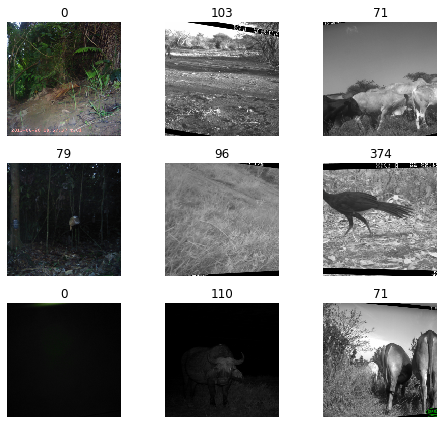

In [141]:
data.show_batch(rows=3, figsize=(7,6))

In [145]:
learn = vision.cnn_learner(data, vision.models.resnet101, metrics=error_rate)

In [146]:
learn.unfreeze()

In [150]:
learn.fit_one_cycle(1)

epoch     train_loss  valid_loss  error_rate  time    


OSError: Caught OSError in DataLoader worker process 5.
Original Traceback (most recent call last):
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/fastai/vision/data.py", line 271, in get
    res = self.open(fn)
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/fastai/vision/data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/fastai/vision/image.py", line 398, in open_image
    x = PIL.Image.open(fn).convert(convert_mode)
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/PIL/Image.py", line 930, in convert
    self.load()
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/PIL/ImageFile.py", line 272, in load
    raise_ioerror(err_code)
  File "/home/marc/git/uni/masterarbeit/19-tuscher/venv/lib/python3.6/site-packages/PIL/ImageFile.py", line 59, in raise_ioerror
    raise IOError(message + " when reading image file")
OSError: broken data stream when reading image file
